In [1]:
import pandas as pd

import pandas as pd
import datetime as dt
import pandas_profiling

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Classification
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("failure.csv")

In [4]:
df1=df.copy()

In [5]:
defaultid = df1[df1.failure == 1].device.unique()    
print("1168 tekil device da fail olanlar=",df1[df1.device.isin(defaultid)].device.nunique())
print("1168 tekil device da fail olmayanlar=",df1[~df1.device.isin(defaultid)].device.nunique())
print("Toplam tekil device=", df1.device.nunique())

1168 tekil device da fail olanlar= 106
1168 tekil device da fail olmayanlar= 1062
Toplam tekil device= 1168


In [6]:
df1[(df1['device']=='S1F0LD15') & (df1['failure']==0)]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
125,2015-01-01,S1F0LD15,0,142117744,0,0,0,6,281773,0,0,0
1288,2015-01-02,S1F0LD15,0,163549216,0,0,0,6,283114,0,0,0
2451,2015-01-03,S1F0LD15,0,185697360,0,0,0,6,284506,0,0,0
3614,2015-01-04,S1F0LD15,0,209328944,0,0,0,6,285842,0,0,0
4775,2015-01-05,S1F0LD15,0,232770528,0,0,0,6,287163,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103036,2015-07-15,S1F0LD15,0,214370320,216,0,1,6,331547,0,0,0
103375,2015-07-16,S1F0LD15,0,10253680,216,0,1,6,331556,0,0,0
103714,2015-07-17,S1F0LD15,0,37417016,216,0,1,6,331556,0,0,0
104053,2015-07-18,S1F0LD15,0,37921400,240,0,1,6,331556,0,0,0


In [7]:
df1[(df1['device']=='S1F0LD15') & (df1['failure']==1)]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
104729,2015-07-20,S1F0LD15,1,241057576,4360,0,11,6,331568,8,8,0


In [8]:
df2=df.copy()

In [9]:
df2['month'] = df2.date.map(lambda x: x.split('-')[1])

In [10]:
df2[df2['device']=='S1F02MGA']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
12,2015-01-01,S1F02MGA,0,44399688,0,266,1,6,399286,0,0,2269,01
1175,2015-01-02,S1F02MGA,0,143057976,0,266,1,6,399286,0,0,2270,01
2338,2015-01-03,S1F02MGA,0,133464400,0,266,1,6,399288,0,0,2270,01
3501,2015-01-04,S1F02MGA,0,237306240,0,266,1,6,399346,0,0,2270,01
4663,2015-01-05,S1F02MGA,0,111869224,0,266,1,6,400149,0,0,2270,01
5824,2015-01-06,S1F02MGA,0,136441184,0,266,1,6,401421,0,0,2270,01


In [11]:
df2[df2['device']=='S1F0166B']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,01
1164,2015-01-02,S1F0166B,0,191946112,0,3,0,6,403174,0,0,0,01
2327,2015-01-03,S1F0166B,0,77681360,0,3,0,6,403174,0,0,0,01
3490,2015-01-04,S1F0166B,0,82195688,0,3,0,6,403175,0,0,0,01
4652,2015-01-05,S1F0166B,0,224339296,0,3,0,6,403812,0,0,0,01
5813,2015-01-06,S1F0166B,0,7441792,0,3,0,6,404786,0,0,0,01


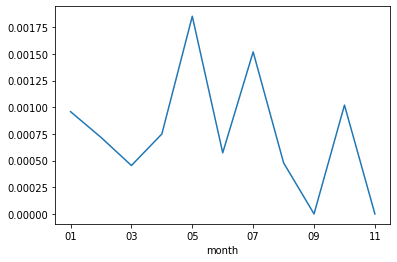

In [12]:
df2.groupby('month')['failure'].mean().plot()

In [13]:
defaultid = df2[df2.failure == 1].device.unique()

In [14]:
defaults=df2[df2.device.isin(defaultid)]

In [15]:
df1['date'] = pd.to_datetime(df1['date'])

In [16]:
df1['work_days']=df1.groupby('device')['date'].rank(method='dense')# bir takvimdeki çalışılan yılları tesbit ediyoruz.

In [17]:
df1[(df1['device']=='S1F01085') & (df1['failure']==0)]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,work_days
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1.0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7,2.0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7,3.0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7,4.0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7,5.0
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,409404,0,0,7,6.0


In [18]:
df1['device_type']=df1['device'].apply(lambda x: str(x)[0:3])

In [19]:
df1['att2']=df1['attribute2'].apply(lambda x: x/8)

In [20]:
df1['att1']=df1['attribute1'].apply(lambda x: x/8)

In [21]:
df1['att39']=df1['attribute3']+df1['attribute9']

In [22]:
df1['attribute7']=df1['attribute7'].apply(lambda x:x/2)

In [23]:
df1['att78']=df1['attribute7'].apply(lambda x:x**2)

In [25]:
df1['month']=df1['date'].apply(lambda x: x.strftime('%m'))

In [26]:
df1['work_days']=df1['work_days'].astype('int')

In [27]:
df1['att2']=df1['att2'].astype('int')

In [28]:
df1['att1']=df1['att1'].astype('int')

In [29]:
df1['att78']=df1['att78'].astype('int')

In [30]:
df1['month']=df1['month'].astype('int')

In [31]:
prep1=df1.groupby(['device']).max()

In [32]:
prep1=prep1.reset_index(0)

In [33]:
prep2=df1.groupby(['device']).min()

In [34]:
prep2=prep2.reset_index(0)

In [35]:
prep1['att6']=prep2['attribute6']

In [36]:
prep1['total_mile']=prep1['attribute6']-prep1['att6']

In [37]:
prep=prep1.copy()

In [38]:
prep=prep.drop(['attribute1','attribute2','attribute3','attribute6','attribute7','attribute8','attribute9','att6'],axis=1)

In [39]:
c={'S1F':0,'W1F':1, 'Z1F':2}
prep['device_type']=prep['device_type'].map(c)

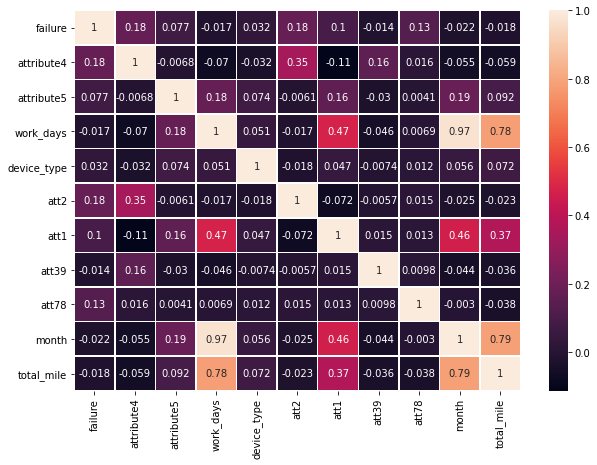

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))
Corr = prep[prep.columns].corr()
sns.heatmap(Corr,annot=True,linewidths=0.5)

In [41]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   device       1168 non-null   object        
 1   date         1168 non-null   datetime64[ns]
 2   failure      1168 non-null   int64         
 3   attribute4   1168 non-null   int64         
 4   attribute5   1168 non-null   int64         
 5   work_days    1168 non-null   int64         
 6   device_type  1168 non-null   int64         
 7   att2         1168 non-null   int64         
 8   att1         1168 non-null   int64         
 9   att39        1168 non-null   int64         
 10  att78        1168 non-null   int64         
 11  month        1168 non-null   int64         
 12  total_mile   1168 non-null   int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 118.8+ KB


In [42]:
prep['attribute4']=prep['attribute4'].astype('category')
prep['attribute5']=prep['attribute5'].astype('category')
prep['device_type']=prep['device_type'].astype('category')
prep['att39']=prep['att39'].astype('category')
prep['att78']=prep['att78'].astype('category')
prep['att2']=prep['att2'].astype('category')
prep['month']=prep['month'].astype('category')

In [43]:
prep['work_days']=prep['work_days'].astype('category')

prep['total_mile']=prep['total_mile'].astype('category')

In [44]:
prep['att1']=prep['att1'].astype('category')

In [45]:
prep=prep.drop(['device','date'],axis=1)

In [46]:
prep.to_csv('dataprep.csv', sep=',')

In [47]:
prep.info()# 124 bin civarındaki satır sayısını 1168 e indirdim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   failure      1168 non-null   int64   
 1   attribute4   1168 non-null   category
 2   attribute5   1168 non-null   category
 3   work_days    1168 non-null   category
 4   device_type  1168 non-null   category
 5   att2         1168 non-null   category
 6   att1         1168 non-null   category
 7   att39        1168 non-null   category
 8   att78        1168 non-null   category
 9   month        1168 non-null   category
 10  total_mile   1168 non-null   category
dtypes: category(10), int64(1)
memory usage: 143.7 KB


In [48]:
x=prep.drop('failure',axis=1)
y=prep['failure']

In [49]:
x=pd.get_dummies(x,drop_first=True)

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix
# dengesiz veri seti olmasından dolayı undersampling uyguladım

In [52]:
def classification_(x,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        rus=RandomUnderSampler(random_state=42)
        
        x_rus,y_rus=rus.fit_resample(x_train,y_train)
        
        predict=i.fit(x_rus,y_rus).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('AccuracyScore',ascending=False)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [54]:
gbc=GradientBoostingClassifier()

In [55]:
rus=RandomUnderSampler(random_state=42)

In [56]:
x_rus,y_rus=rus.fit_resample(x_train,y_train)

In [57]:
pred=gbc.fit(x_rus,y_rus).predict(x_test)

In [58]:
confusion_matrix(y_test,pred)#211 FP

array([[211,  55],
       [  1,  25]])

In [59]:
classification_(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Bernoulli,0.935897,0.588235,0.555556,0.571429
KNeigbors,0.931624,0.666667,0.222222,0.333333
Gaussian,0.927350,0.520000,0.722222,0.604651
RandomForest,0.910256,0.434783,0.555556,0.487805
Multinominal,0.893162,0.410256,0.888889,0.561404
SVC,0.820513,0.277778,0.833333,0.416667
LogisticRegr,0.807692,0.254545,0.777778,0.383562
DecisionTree,0.794872,0.241379,0.777778,0.368421
AdaBoost,0.786325,0.241935,0.833333,0.375000
GradientBoosting,0.653846,0.175258,0.944444,0.295652


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)

RUS=RandomUnderSampler(random_state=42)
x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)

In [78]:
model=Sequential()
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
history = model.fit(x_RUS,y_RUS, batch_size=128, epochs=100, verbose=1, validation_data=(x_test,y_test))

Epoch 1/100
2/2 [==============================] - 1s 430ms/step - loss: 0.6937 - accuracy: 0.5052 - val_loss: 0.6970 - val_accuracy: 0.1130
Epoch 2/100
2/2 [==============================] - 0s 126ms/step - loss: 0.6886 - accuracy: 0.5824 - val_loss: 0.6777 - val_accuracy: 0.9007
Epoch 3/100
2/2 [==============================] - 0s 132ms/step - loss: 0.6661 - accuracy: 0.9376 - val_loss: 0.7587 - val_accuracy: 0.2055
Epoch 4/100
2/2 [==============================] - 0s 127ms/step - loss: 0.5294 - accuracy: 0.8778 - val_loss: 0.4148 - val_accuracy: 0.9041
Epoch 5/100
2/2 [==============================] - 0s 139ms/step - loss: 0.2415 - accuracy: 0.9723 - val_loss: 0.6970 - val_accuracy: 0.7774
Epoch 6/100
2/2 [==============================] - 0s 131ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.7292 - val_accuracy: 0.8938
Epoch 7/100
2/2 [==============================] - 0s 134ms/step - loss: 1.8666e-05 - accuracy: 1.0000 - val_loss: 1.2192 - val_accuracy: 0.9110
Epoch 8/1

In [80]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 12ms/step - loss: 19.3890 - accuracy: 0.9144
Accuracy: 91.44
